In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns

import scikitplot as skplt
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('D:/桌面/male_below_age.csv')

In [3]:
# This defines data type
for column in df.columns:
    data_type = df[column].dtype
    print(f"Column '{column}' has data type: {data_type}")

Column 'Age' has data type: int64
Column 'Sex' has data type: object
Column 'ChestPainType' has data type: object
Column 'RestingBP' has data type: int64
Column 'Cholesterol' has data type: int64
Column 'FastingBS' has data type: int64
Column 'RestingECG' has data type: object
Column 'MaxHR' has data type: int64
Column 'ExerciseAngina' has data type: object
Column 'Oldpeak' has data type: float64
Column 'ST_Slope' has data type: object
Column 'HeartDisease' has data type: int64


In [4]:
# Apply label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

In [5]:
# define our features 
X = df.drop(["HeartDisease"], axis=1)
# define our target
y = df[["HeartDisease"]]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [7]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, RocCurveDisplay, auc, precision_recall_curve, PrecisionRecallDisplay, average_precision_score
from sklearn.model_selection import cross_val_score

In [8]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, max_features='sqrt', random_state=0) 
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
roc_auc_score(y_test, y_pred)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7314814814814814

In [9]:
print('confusion matrix = \n', confusion_matrix(y_test, y_pred, labels=[1, 0]))
print('accuracy = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred))

confusion matrix = 
 [[53  1]
 [14 13]]
accuracy =  0.8148148148148148
precision =  0.7910447761194029
recall =  0.9814814814814815
f1 score =  0.8760330578512396


In [10]:
import shap  

explainer = shap.TreeExplainer(rfc)

shap_values = explainer.shap_values(X_test)

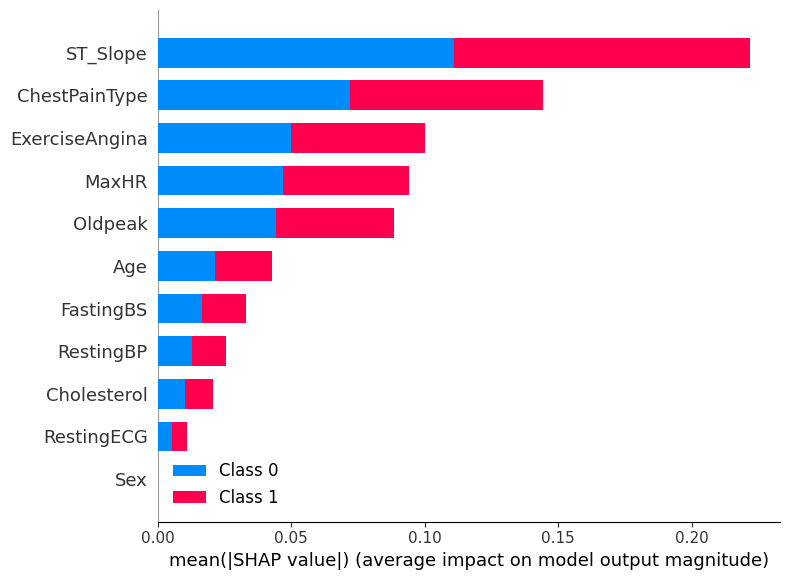

In [11]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

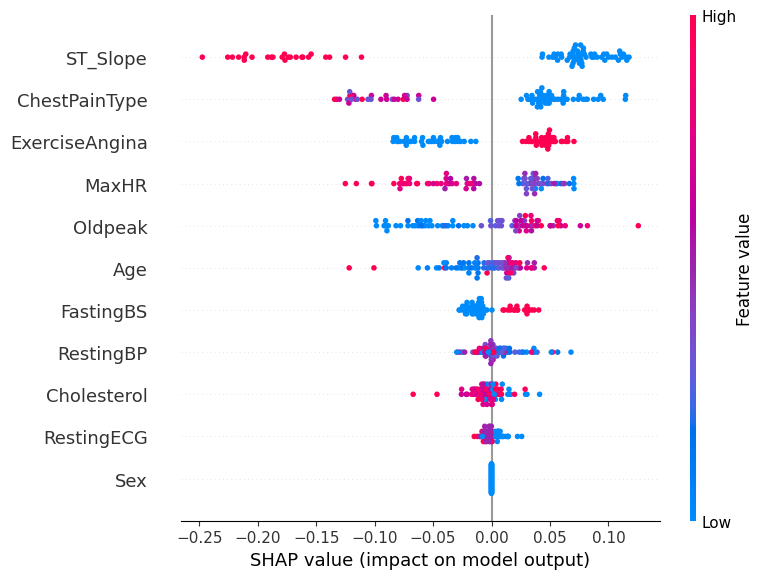

In [12]:
shap.summary_plot(shap_values[1], X_test)